# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [81]:
# Combine the data into a single DataFrame
combined = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [82]:
# Checking the number of mice.
num_mice = combined["Mouse ID"].nunique()
num_mice

249

In [83]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
unique_duplicate_mice_ids

array(['g989'], dtype=object)

In [84]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data_for_duplicate_mouse = combined[combined['Mouse ID'] == 'g989']
all_data_for_duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [85]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined = combined[combined['Mouse ID'] != 'g989']
clean_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [86]:
# Checking the number of mice in the clean DataFrame.
num_mice_in_clean_data = clean_combined["Mouse ID"].nunique()
num_mice_in_clean_data

248

## Summary Statistics

In [87]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_regimen = clean_combined.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = grouped_regimen['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Assemble the resulting series into a single summary DataFrame.
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Variance Tumor Volume',
    'std': 'Std. Deviation Tumor Volume',
    'sem': 'SEM Tumor Volume'
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [88]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_advanced = clean_combined.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)

summary_stats_advanced

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

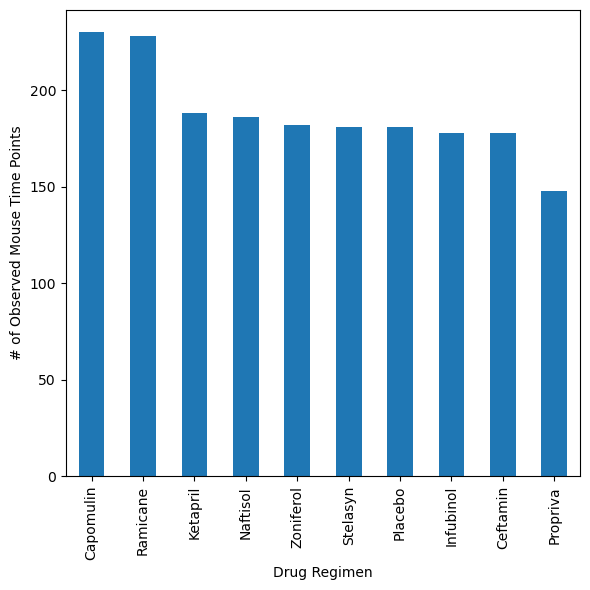

In [89]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group the data by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = clean_combined['Drug Regimen'].value_counts()

# Create a bar plot
regimen_counts.plot(kind='bar', figsize=(6, 6))

# Set plot title and axis labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Time Points')

# Show the plot
plt.tight_layout()
plt.show()

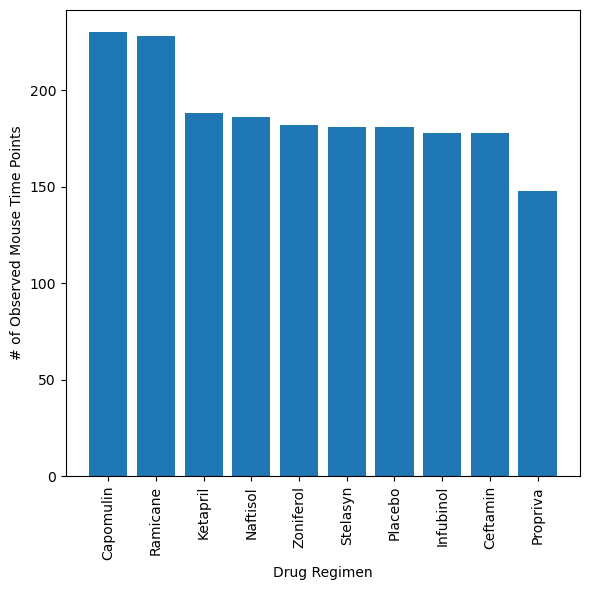

In [90]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Extract the regimen names and corresponding counts
regimen_names = regimen_counts.index
regimen_values = regimen_counts.values

# Create a bar plot using pyplot
plt.figure(figsize=(6, 6))
plt.bar(regimen_names, regimen_values)

# Set plot title and axis labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Time Points')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

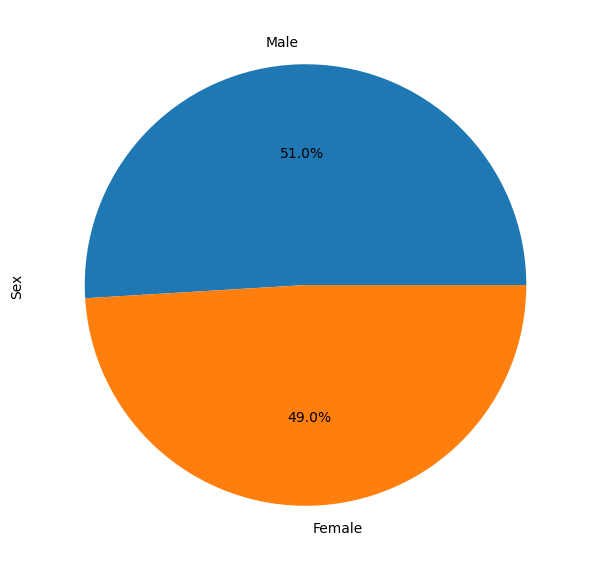

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group the data by 'Sex' and count the number of mice in each group
sex_distribution = clean_combined['Sex'].value_counts()

# Create a pie plot using Pandas
ax = sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=0, figsize=(6, 6))

# Remove the 'Sex' label from the y-axis
ax.set_ylabel('Sex')

# Show the plot
plt.tight_layout()
plt.show()

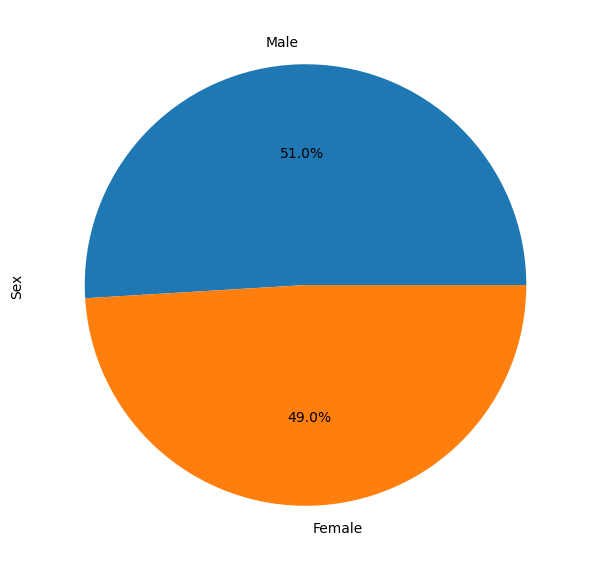

In [92]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group the data by 'Sex' and count the number of mice in each group
sex_distribution = clean_combined['Sex'].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(6, 6))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=0)

# Remove the 'Sex' label from the y-axis
plt.ylabel('Sex')

# Show the plot
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [93]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_combined[clean_combined['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'], how='inner')


In [94]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
potential_outliers = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatment_regimens:
    # Filter the data for the current regimen
    regimen_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # Append the tumor volume data to the list for plotting
    tumor_vol_data.append(regimen_data)
    
    # Calculate quartiles and IQR for the current regimen
    quartiles = regimen_data.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Calculate lower and upper bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Locate potential outliers (above the upper bound)
    outliers = regimen_data[regimen_data > upper_bound]
    
    # Store potential outliers and the name in the dictionary
    potential_outliers[regimen] = {"Outliers": outliers, "Name": regimen_data.name}

# Print potential outliers and the name for each regimen
for regimen, data in potential_outliers.items():
    print(f"{regimen}'s potential outliers:")
    print(outliers)
    print("Name:", data["Name"])
    print("\n")

Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Name: Tumor Volume (mm3)


Ramicane's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Name: Tumor Volume (mm3)


Infubinol's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Name: Tumor Volume (mm3)


Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Name: Tumor Volume (mm3)




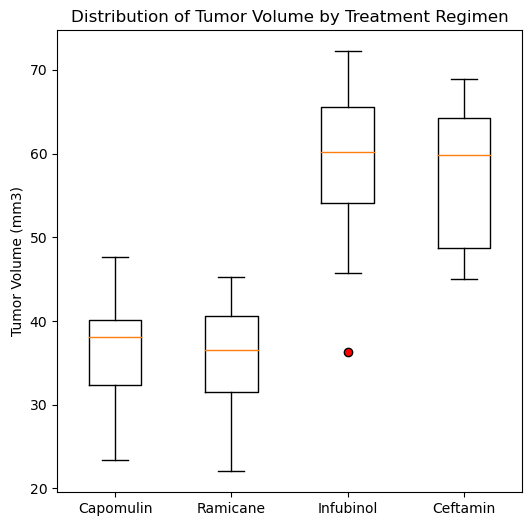

In [95]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(6, 6))
plt.boxplot(tumor_vol_data, labels=treatment_regimens, flierprops={'marker': 'o', 'markerfacecolor': 'red'})
plt.title('Distribution of Tumor Volume by Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

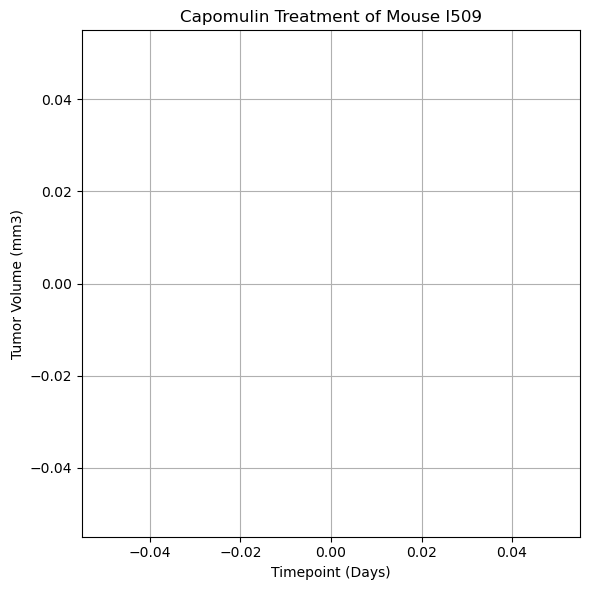

In [104]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for the specific mouse (I509) treated with Capomulin
mouse_data = clean_combined[(clean_combined['Mouse ID'] == 'I509') & (clean_combined['Drug Regimen'] == 'Capomulin')]

# Create a line plot of tumor volume vs. time point
plt.figure(figsize=(6, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')

# Set plot title and axis labels
plt.title('Capomulin Treatment of Mouse I509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

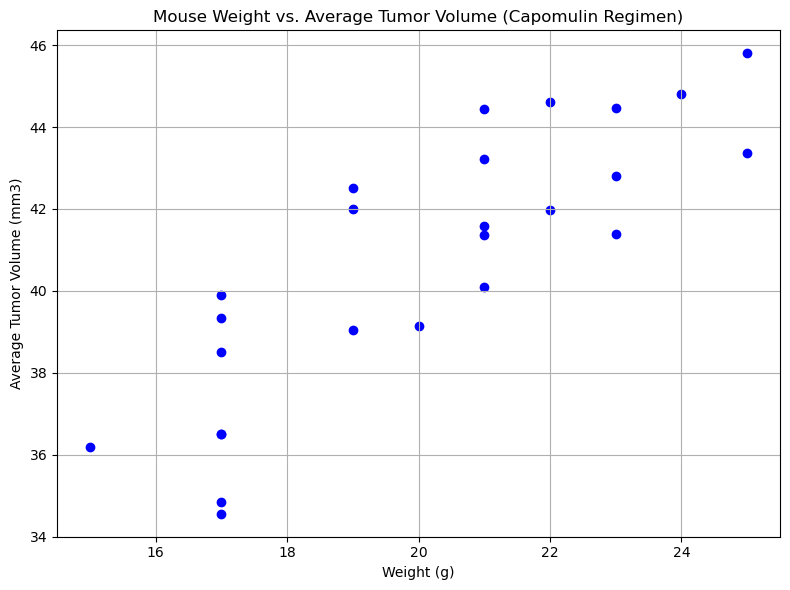

In [103]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = clean_combined[clean_combined['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Extract the corresponding mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='b')

# Set plot title and axis labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


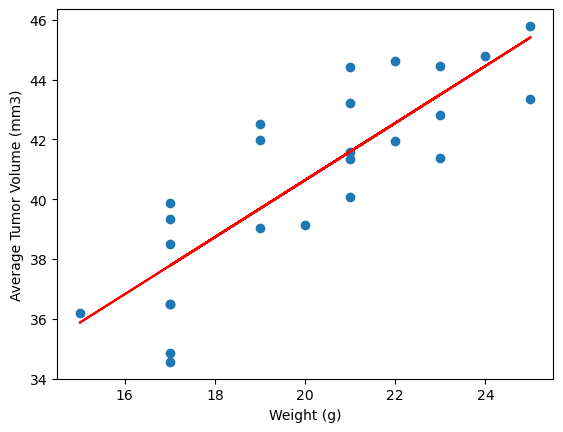

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
